In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import signal
from scipy.fft import fftshift
import soundfile as sf
import sounddevice as sd
from moviepy.editor import VideoFileClip, AudioFileClip

### data

In [2]:
df1 = pd.read_csv('inspiral-e0.7-p5.0-iota1.57.csv', delimiter=',')
df2 = pd.read_csv('waveform-e0.7-p5.0-iota1.57.csv', delimiter=',')

In [3]:
t = df1['t'].to_numpy()

hplus = df2['plus'].to_numpy()
hcross = df2['cross'].to_numpy()

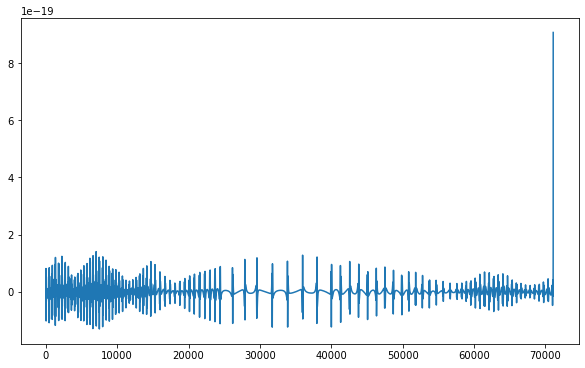

In [4]:
plt.figure(figsize = (10, 6))

plt.plot(t, hplus)
# plt.plot(t, hcross)

plt.show()

### interpolate

In [5]:
# interpolation functions
itphplus = interp1d(t, hplus, kind = 'linear')
itphcross = interp1d(t, hcross, kind = 'linear')

m = 200000

titp = np.linspace(t.min(), t.max(), m, False)

# interpolate
hplusitp = itphplus(titp)
hcrossitp = itphcross(titp)

In [6]:
# new values
start = 2500
numpoints = 24000
stop = start + numpoints

stop

26500

In [7]:
t = titp[start:stop]
hplus = hplusitp[start:stop]
hcross = hcrossitp[start:stop]

In [8]:
# interpolation functions
itphplus = interp1d(t, hplus, kind = 'linear')
itphcross = interp1d(t, hcross, kind = 'linear')

# new time
fs = 1000
seconds = 40
# seconds = t.max()

titp = np.linspace(t.min(), t.max(), fs * seconds, False)

# interpolate
hplusitp = itphplus(titp)
hcrossitp = itphcross(titp)

# plt.figure(figsize = (10, 6))

# plt.plot(titp, hplusitp)
# plt.plot(titp, hcrossitp)

# plt.show()

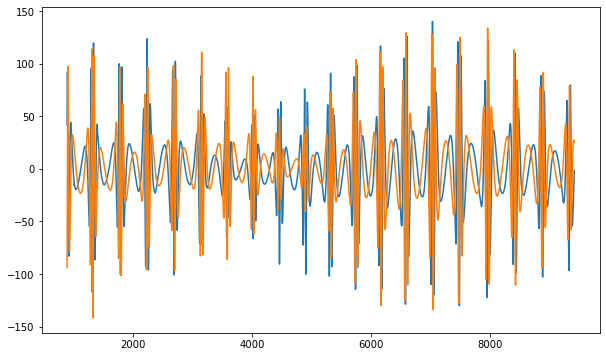

In [9]:
# scale
hplusitpscaled = 1e21 * hplusitp
hcrossitpscaled = 1e21 * hcrossitp 

plt.figure(figsize = (10, 6))

plt.plot(titp, hplusitpscaled)
plt.plot(titp, hcrossitpscaled)

plt.show()

In [10]:
sf.write('waveform-hplus-e0.7-p5.0-iota1.57-v2.wav', hplusitpscaled, fs)
sf.write('waveform-hcross-e0.7-p5.0-iota1.57-v2.wav', hcrossitpscaled, fs)
# sd.play(hplusitpscaled, fs)
# sd.wait()

In [11]:
hplusaudio, fs1 = sf.read('waveform-hplus-e0.7-p5.0-iota1.57-v2.wav')
hcrossaudio, fs2 = sf.read('waveform-hcross-e0.7-p5.0-iota1.57-v2.wav')

In [12]:
combinedaudio = np.column_stack((hplusaudio, hcrossaudio))
sf.write('waveform-e0.7-p5.0-iota1.57-v2.wav', combinedaudio, fs1)

### animation with sound

In [13]:
video = VideoFileClip("inspiral-waveform-animation-e0.7-p5.0-iota1.57-v2.mp4")
audio = AudioFileClip("waveform-e0.7-p5.0-iota1.57-v2.wav")

In [14]:
video_duration = video.duration
audio_duration = audio.duration

if audio_duration != video_duration:
    print("audio and video durations are not the same")

In [15]:
video = video.set_audio(audio)
video.write_videofile("inspiral-waveform-animation-sound-e0.7-p5.0-iota1.57-v2.mp4")

# codec='libx264', audio_codec='aac'

Moviepy - Building video inspiral-waveform-animation-sound-e0.7-p5.0-iota1.57-v2.mp4.
MoviePy - Writing audio in inspiral-waveform-animation-sound-e0.7-p5.0-iota1.57-v2TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video inspiral-waveform-animation-sound-e0.7-p5.0-iota1.57-v2.mp4



Moviepy - Done !
Moviepy - video ready inspiral-waveform-animation-sound-e0.7-p5.0-iota1.57-v2.mp4
